In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('medicine.csv')

In [3]:
df.head()

,VAR,Variable,UNIT,Measure,COU,Country,YEA,Year,Value,Flag Codes,Flags
0,PHARALIM,A-Alimentary tract and metabolism,NBPYEANB,Defined daily dosage per 1 000 inhabitants per...,AUS,Australia,2010,2010,145.8,D,Difference in methodology
1,PHARALIM,A-Alimentary tract and metabolism,NBPYEANB,Defined daily dosage per 1 000 inhabitants per...,AUS,Australia,2011,2011,151.5,D,Difference in methodology
2,PHARALIM,A-Alimentary tract and metabolism,NBPYEANB,Defined daily dosage per 1 000 inhabitants per...,AUS,Australia,2012,2012,153.5,D,Difference in methodology
3,PHARALIM,A-Alimentary tract and metabolism,NBPYEANB,Defined daily dosage per 1 000 inhabitants per...,AUS,Australia,2013,2013,150.0,B; D,Break; Difference in methodology
4,PHARALIM,A-Alimentary tract and metabolism,NBPYEANB,Defined daily dosage per 1 000 inhabitants per...,AUS,Australia,2014,2014,151.9,D,Difference in methodology


In [4]:
df = df.drop(['VAR','UNIT','Measure','COU','YEA','Flag Codes','Flags'],axis=1)
df

,Variable,Country,Year,Value
0,A-Alimentary tract and metabolism,Australia,2010,145.8
1,A-Alimentary tract and metabolism,Australia,2011,151.5
2,A-Alimentary tract and metabolism,Australia,2012,153.5
3,A-Alimentary tract and metabolism,Australia,2013,150.0
4,A-Alimentary tract and metabolism,Australia,2014,151.9
...,...,...,...,...
67019,J01-Antibacterials for systemic use,Romania,2016,24.4
67020,J01-Antibacterials for systemic use,Romania,2017,24.5
67021,J01-Antibacterials for systemic use,Romania,2018,25.1
67022,J01-Antibacterials for systemic use,Romania,2019,25.8


In [5]:
df.shape

(67024, 4)

In [6]:
df = df.head(11)
df

,Variable,Country,Year,Value
0,A-Alimentary tract and metabolism,Australia,2010,145.8
1,A-Alimentary tract and metabolism,Australia,2011,151.5
2,A-Alimentary tract and metabolism,Australia,2012,153.5
3,A-Alimentary tract and metabolism,Australia,2013,150.0
4,A-Alimentary tract and metabolism,Australia,2014,151.9
5,A-Alimentary tract and metabolism,Australia,2015,151.3
6,A-Alimentary tract and metabolism,Australia,2016,149.5
7,A-Alimentary tract and metabolism,Australia,2017,149.3
8,A-Alimentary tract and metabolism,Australia,2018,150.8
9,A-Alimentary tract and metabolism,Australia,2019,144.2


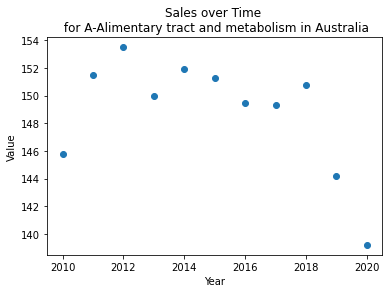

In [7]:
plt.scatter(df['Year'],df['Value'])
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Sales over Time \n for A-Alimentary tract and metabolism in Australia')
plt.show()

## LinearRegression

Predicted sales for next year: 144.7763636363636


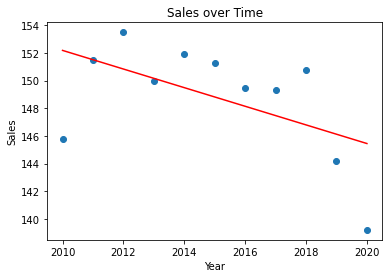

In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# # Load the dataset
data = pd.read_csv('medicine.csv')
df = data.head(11) 

# Prepare the data
X = df['Year'].values.reshape(-1, 1)
y = df['Value'].values.reshape(-1, 1)

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Predict the sales for next year
next_year_sales = model.predict([[2021]])[0][0]

print(f"Predicted sales for next year: {next_year_sales}")

plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Sales over Time')
plt.show()

## PolynomialRegression

Predicted sales for next year: 136.3975757570006


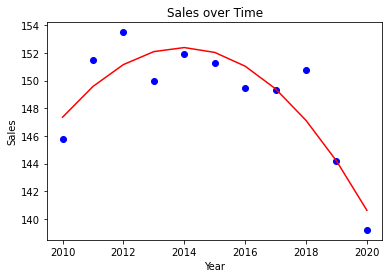

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# # Load the dataset
data = pd.read_csv('medicine.csv')
df = data.head(11)

# Prepare the data
X = df['Year'].values.reshape(-1, 1)
y = df['Value'].values.reshape(-1, 1)

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Predict the sales for next year
next_year = np.array([[2021]])
next_year_poly = poly.transform(next_year)
next_year_sales = model.predict(next_year_poly)[0][0]
print(f"Predicted sales for next year: {next_year_sales}")

# Visualize the data and the best fit line
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X_poly), color='red')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Sales over Time')
plt.show()
